In [ ]:
'''降维算法中的”降维“，指的是降低特征矩阵中特征的数量。上周的课中我们说过，降维的目的是为了让算法运算更
快，效果更好，但其实还有另一种需求：数据可视化。从上面的图我们其实可以看得出，图像和特征矩阵的维度是
可以相互对应的，即一个特征对应一个特征向量，对应一条坐标轴。所以，三维及以下的特征矩阵，是可以被可视
化的，这可以帮助我们很快地理解数据的分布，而三维以上特征矩阵的则不能被可视化，数据的性质也就比较难理
解。'''

In [ ]:
#sklearn中降维算法都被包括在模块decomposition中，这个模块本质是一个矩阵分解模块。

#PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。

#class sklearn.decomposition.PCA (n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0,iterated_power=’auto’, random_state=None)
#通过某种变化，找出n个新的特征向量，以及它们构成的新n维空间V
#找出原始数据在新特征空间V中的n个新特征向量上对应的值，即“将数据映射到新空间中”
#找出n个新特征向量，让数据能够被压缩到少数特征上并且总信息量不损失太多的技术就是矩阵分解。

In [ ]:
#######2.2 重要参数n_components 降维后需要保留的特征数量

In [ ]:
#2.2.1 迷你案例：高维数据的可视化

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()

In [6]:
X = iris.data
y = iris.target

In [14]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 作为数组，X是几维？
X.shape

(150, 4)

In [10]:
# 作为数据表或特征矩阵，X是几维？
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# 调用PCA
pca = PCA(n_components=2) #实例化
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵

In [13]:
X_dr
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [17]:
X_dr[y ==0 , 0] #取出y=0的行，第一个特征的数据

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

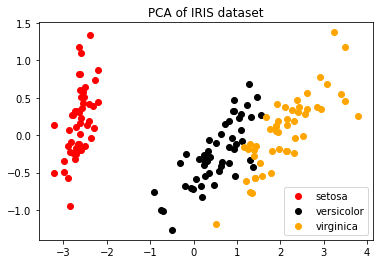

In [18]:
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

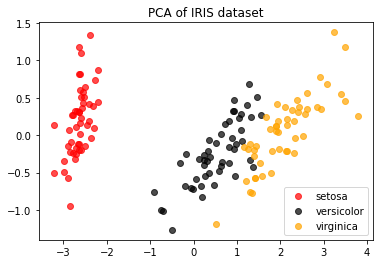

In [26]:
colors = ['red', 'black', 'orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y==i, 0]
                ,X_dr[y==i, 1]
                ,alpha=.7#图像透明度
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [27]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [28]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [29]:
#大部分信息都被有效地集中在了第一个特征上
pca.explained_variance_ratio_.sum()

0.977685206318795

In [30]:
# 选择最好的n_components：累积可解释方差贡献率曲线
# 选转折点

In [32]:
pca_line = PCA().fit(X)

In [33]:
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [35]:
import numpy as np
np.cumsum(pca_line.explained_variance_ratio_) #输出叠加后的数列

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

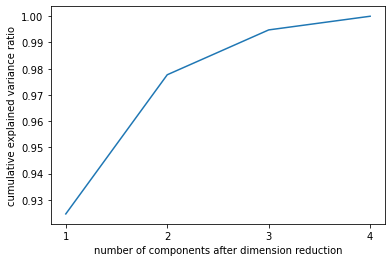

In [36]:
import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [ ]:
#2.2.1 迷你案例：高维数据的可视化

In [ ]:
#2.2.2 最大似然估计自选超参数

In [37]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了3个特征

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [38]:
pca_mle.explained_variance_ratio_.sum()
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267247

In [ ]:
#2.2.2 最大似然估计自选超参数

In [ ]:
#2.2.3 按信息量占比选超参数

In [ ]:
'''输入[0,1]之间的浮点数，并且让参数svd_solver =='full'，表示希望降维后的总解释性方差占比大于n_components
指定的百分比，即是说，希望保留百分之多少的信息量。比如说，如果我们希望保留97%的信息量，就可以输入
n_components = 0.97，PCA会自动选出能够让保留的信息量超过97%的特征数量。'''

In [41]:
pca_f = PCA(n_components=0.99, svd_solver='full')
pca_f = pca_f.fit(X)
X_f =pca_f.transform(X)

In [43]:
pca_f.explained_variance_ratio_.sum()

0.9947878161267247

In [ ]:
#2.2.3 按信息量占比选超参数

In [ ]:
#######2.2 重要参数n_components 降维后需要保留的特征数量

In [ ]:
#######2.3 PCA中的SVD

In [ ]:
#2.3.1 PCA中的SVD哪里来？
#fit中奇异值分解的结果除了V(k,n)以外，就会被舍弃，而V(k,n)会被保存在属性components_ 当中，

In [44]:
PCA(2).fit(X).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [46]:
X.shape

(150, 4)

In [45]:
PCA(2).fit(X).components_.shape #(k,n) k = n_components

(2, 4)

In [ ]:
#2.3.1 PCA中的SVD哪里来？

In [ ]:
#2.3.2 重要参数svd_solver 与 random_state
# svd_solver:full 少，randomized：多数据时 auto自动选